### Gerekli Kütüphanelerin Yüklenmesi
Analiz için pandas, matplotlib ve numpy kütüphaneleri içe aktarılıyor.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# pythonda uyarıları kapatır
import warnings
warnings.filterwarnings("ignore")

### Verinin Yüklenmesi
CSV dosyasından veri okunarak `veri` adlı DataFrame'e aktarılıyor.

In [5]:
veri=pd.read_csv("olimpiyatlar.csv")
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Veri Hakkında Bilgi
* Bu bölümde veri içerisinde bulunan her bir sütun içerisinde kaç adet örnek var, bu verilerin veri tipleri nedir ve veri tiplerinin tüm veri içerisinde dağılımı nedir gibi veriyi tanımak için gerekli temel soruları cevaplayacağız.


### Veri Yapısı İncelemesi
Veri kümesindeki sütunlar, veri tipleri ve eksik veri durumları gözlemleniyor.

In [6]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


<a id='2'></a>
## Verinin Temizlenmesi
* Sütun İsimlerinin Düzenlenmesi
* Yararsız Verinin Çıkarılması ve Düzenlenmesi
* Kayıp Veri Sorunu 

### Sütun İsimlerinin Düzenlenmesi
* Bu bölümde veri içerisinde bulunan sütun isimlerini inceleyeceğiz ve bu isimleri Türkçeye çevireceğiz.

### Sütun İsimlerinin Görüntülenmesi
Verideki mevcut sütun isimleri listeleniyor.

In [7]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

### Sütun İsimlerinin Düzenlenmesi
İngilizce sütun isimleri Türkçeye çevriliyor ve daha anlamlı hale getiriliyor.

In [8]:
veri.rename(columns={'ID': 'id',
                    'Name':'isim',
                    'Sex':'cinsiyet',
                    'Age':'yas',
                    'Height':'boy',
                    'Weight':'kilo',
                    'Team':'takim',
                    'NOC':'kod',
                    'Games':'oyunlar',
                    'Year':'yil',
                    'Season':'sezon',
                    'City':'sehir',
                    'Sport':'spor',
                    'Event':'etkinlik',
                    'Medal':'madalya'},inplace=True)
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,kod,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


### Yararsız Verinin Çıkarılması ve Düzenlenmesi
* id sütunu veri hakkında herhangi bir bilgi vermediği için çıkarılacaktır.
* oyunlar sütunu yıl ve sezon sütunlarının birleşimi olduğu için yararsız veri olarak kabul edilir ve çıkarılabilir.

### Kayıp Veri Sorunu 
* Kayıp veri kavramı veri içerisinde bulunan örneğin herhangi bir sütununda bulunan değerin olmaması anlamına gelir. 
* Mesela, aşağıda bulunan veride ikinci index'te bulunan örneğin boy ve kilo sütunlarında NaN (Not a Number) yazmaktadır. Bu NaN yazısı örneğe ait boy ve kilo verisinin olmadığı ya da kayıp olduğu anlamına gelir.

### Yararsız Sütunların Silinmesi
'ID' ve 'oyunlar' sütunları veri analizinde kullanılmadığı için kaldırılıyor.

In [9]:
veri.drop(["id","oyunlar"],axis=1,inplace=True)

### İlk 3 Satırın Görüntülenmesi
Temizlenen veriden örnek satırlar gösteriliyor.

In [10]:
veri.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,kod,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


* Kayıp veri ile mücadele etmek için,
    1. Kayıp veriye ait örnekler veriden çıkarılabilir.
    1. Kayıp veriler asıl verinin dağılımını bozmayacak şekilde asıl verinin ortalama ya da medyan değerlerine göre doldurulabilir.
* Bu veri üzerinde çalışma yaparken, 
    1. Boy ve kilo sütununda bulunan kayıp veriyiyi etkinlik ortalamasına göre dolduracağız.
    1. Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.
    1. Madalya alamayan sporcuları veri setinden çıkaracağız.

### Boy ve Kilo Sütunu Kayıp Veri Doldurma
* Boy ve kilo sütununda bulunan kayıp veriyiyi etkinlik ortalamasına göre dolduracağız.

### Eksik Boy ve Kilo Verilerinin Doldurulması
Etkinlik ortalamalarına göre boy ve kilo sütunlarındaki eksik veriler dolduruluyor.

In [11]:
# 1. Boy ve kilo sütununda bulunan kayıp veriyiyi etkinlik ortalamasına göre dolduracağız.
essiz_etkinlik=pd.unique(veri.etkinlik)
print("Etkinlik Sayısı=",len(essiz_etkinlik))
print(essiz_etkinlik[:10])


Etkinlik Sayısı= 765
["Basketball Men's Basketball" "Judo Men's Extra-Lightweight"
 "Football Men's Football" "Tug-Of-War Men's Tug-Of-War"
 "Speed Skating Women's 500 metres" "Speed Skating Women's 1,000 metres"
 "Cross Country Skiing Men's 10 kilometres"
 "Cross Country Skiing Men's 50 kilometres"
 "Cross Country Skiing Men's 10/15 kilometres Pursuit"
 "Cross Country Skiing Men's 4 x 10 kilometres Relay"]


In [12]:
# her bir etkinliği iteratif olarak dolaş
veri_gecici=veri.copy()
nan_listesi=["boy","kilo"]
for e in essiz_etkinlik:
    etkinlik_filtre=veri_gecici.etkinlik==e
    filtreli_veri=veri_gecici[etkinlik_filtre]
    for s in nan_listesi:
        ortalama=np.round(np.mean(filtreli_veri[s]),2)
        if ~np.isnan(ortalama):
           filtreli_veri[s].fillna(ortalama,inplace=True)
        else:
           ortalama=np.round(np.mean(veri_gecici[s]),2)
           filtreli_veri[s].fillna(ortalama,inplace=True)

    veri_gecici[etkinlik_filtre]=filtreli_veri

veri=veri_gecici.copy()
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   kod       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


### Yaş Sütunu Kayıp Veri Doldurma
* Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.

In [13]:
yas_ortalamasi=np.round(np.mean(veri.yas),2)
veri.yas.fillna(yas_ortalamasi,inplace=True)
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   kod       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


### Madalya Alamayan Sporcuları Veri Setinden Çıkar
* Madalya alamayan sporcuları veri setinden çıkaracağız.

In [14]:
madalya_filtresi=~pd.isnull(veri.madalya)
veri=veri[madalya_filtresi]



In [15]:
# Önümüzdeki derslerde kullanmak için veriyi kaydet
veri.to_csv("olimpiyatlar_madalya_alanlar.csv",index=False)

<a id='3'></a>
## Tek Değişkenli Veri Analizi
Bu bölümde veri içerisinde bulunan sayısal ve kategorik verilerin tek tek incelemesini yapacağız.
* Sayısal Değişkenler:
    1. yas   
    1. boy
    1. kilo
    1. yil
* Kategorik Değişkenler:
    1. isim
    1. cinsiyet
    1. takim
    1. UOK
    1. sezon
    1. sehir
    1. spor
    1. etkinlik
    1. madalya

### Sayısal Değişkenler
* Veri içerisinde 4 adet sayısal değişken bulunmaktadır. Bunlar:     
    1. yas   
    1. boy
    1. kilo
    1. yil
* Sayısal değişkenleri incelemek ve yorumlamak için veri sıkılığı ve temel istatistik bilgilerini kullanacağız.
* Veri sıklığı bilgilerini histogram gradiği sayesinde inceleyeceğiz.
* Temel istatistik bilgilerini ise kutu grafiği sayesinde yorumlayacağız.

In [16]:
# öncelikli olarak histogram grafiğini elde edeceğimiz metodumuzu yazalım.
def plotHistogram(degisken):
    plt.figure()
    plt.hist(veri[degisken],bins=100,color="blue")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title( f"{degisken}-Veri Sıklığı")
    plt.show()


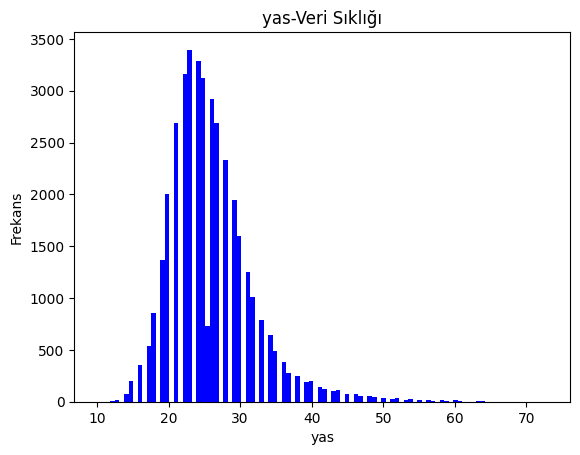

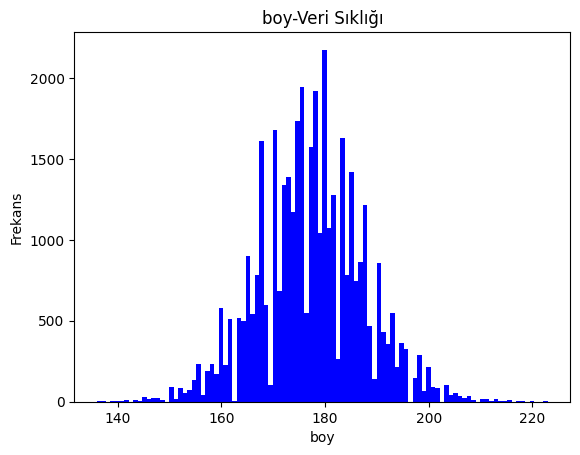

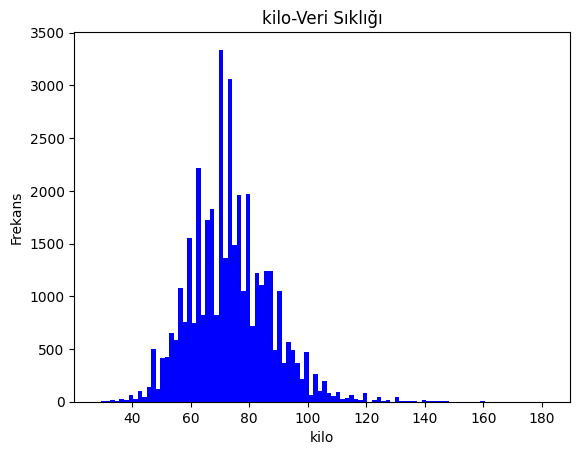

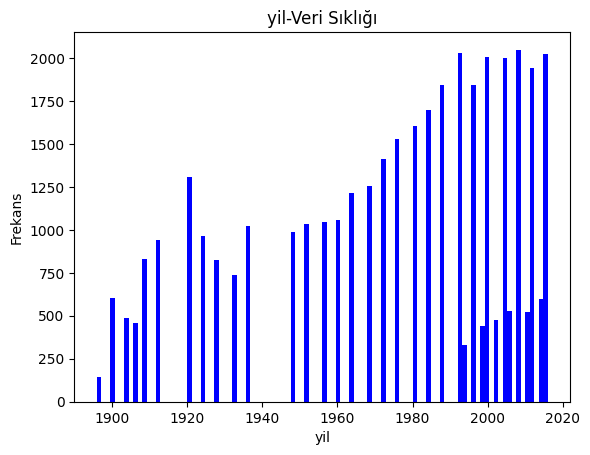

In [17]:
# sayısal değişkenler için histogram çizdirelim
sayisal_degiskenler=["yas","boy","kilo","yil"]
for i in sayisal_degiskenler:
    plotHistogram(i)


* Beklenildiği gibi yaş, kilo ve boy sütunlarında normal dağılıma yakın bir dağılım söz konusu. 
* Yıl sütununda ise ilk olarak göze çarpan son yüzyılda gerçekleşen savaş zamanlarında olimpiyatların yapılmadığı ve son 20 yılda olimpiyatların eski yıllara göre daha çok yapıldığıdır.

In [18]:
# veri içerisinde bulunan sayısal değerleri istatistiksel açıdan inceleyelim
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.337864,73.751840,1973.943845
std,5.859569,10.169900,13.976279,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


* Sayısal verinin istatistiksel özellikleri
    1. count: Örnek sayısı
    1. mean: Ortalama
    1. std: Standart sapma
    1. min: Minimum değer
    1. 25%: Birinci çeyrek
    1. 50%: Medyan
    1. 75%: Üçüncü çeyrek
    1. max: Maximum değer
* 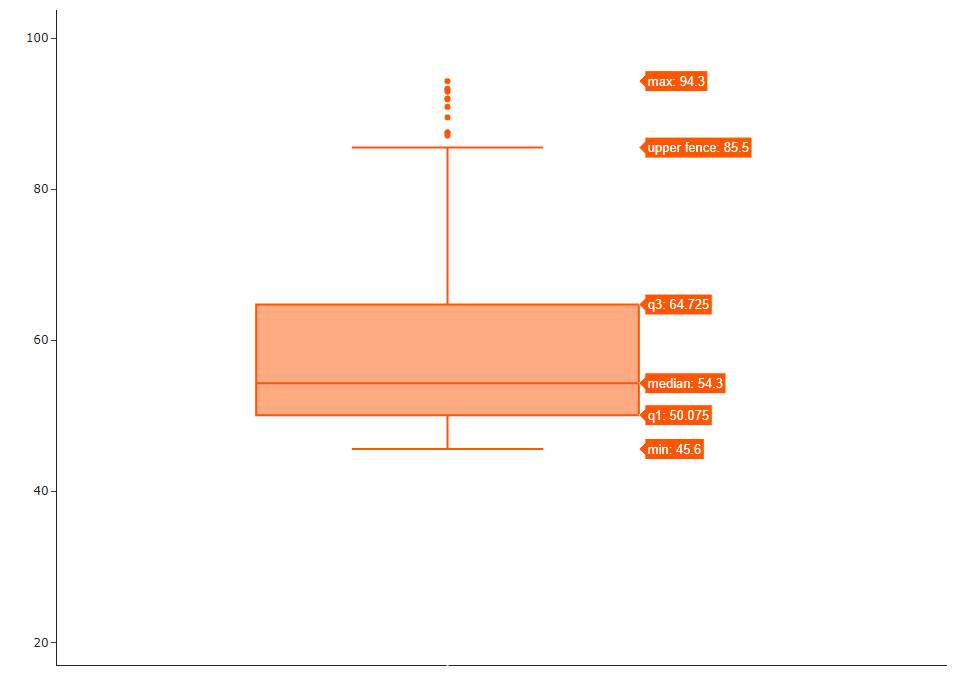

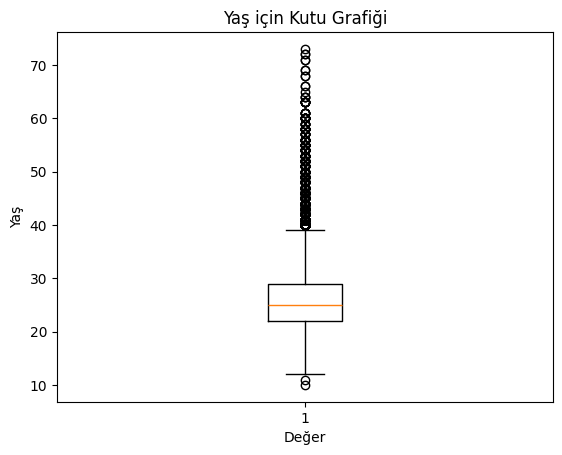

In [19]:
plt.boxplot(veri.yas)
plt.title("Yaş için Kutu Grafiği")
plt.ylabel("Yaş")
plt.xlabel("Değer")
plt.show()

### Kategorik Değişkenler
* Veri içerisinde 9 adet kategorik değişken bulunmaktadır. Bunlar:
    1. isim
    1. cinsiyet
    1. takim
    1. uok
    1. sezon
    1. sehir
    1. spor
    1. etkinlik
    1. madalya
* Kategorik değişkenleri incelemek ve yorumlamak için bar grafiklerini kullanacağız.

In [20]:
def plot_bar(degisken, n=5):
    veri[degisken].value_counts().head(n).plot(kind='bar', color='orange', figsize=(8, 6))
    plt.xticks(rotation=60)
    plt.ylabel("Frekans")
    plt.title(f"{degisken} Veri Sıklığı")
    plt.show()

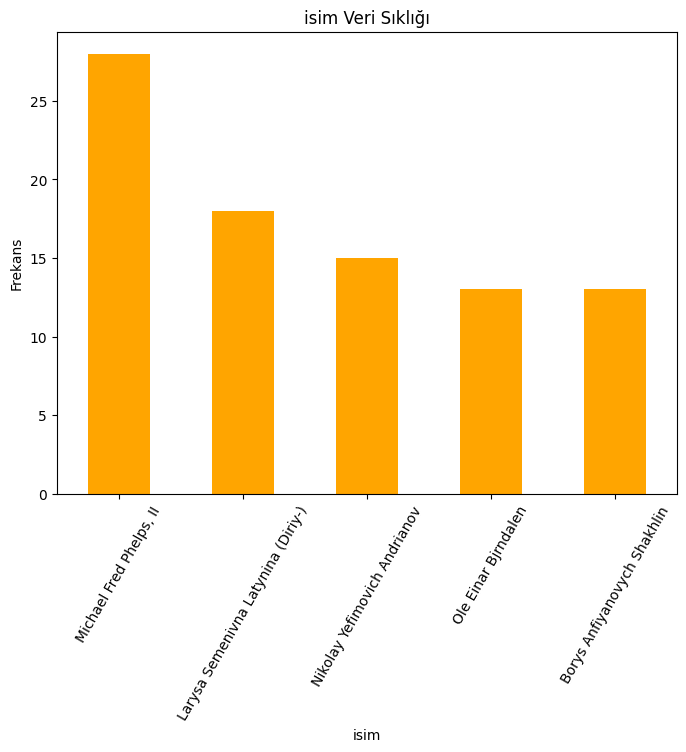

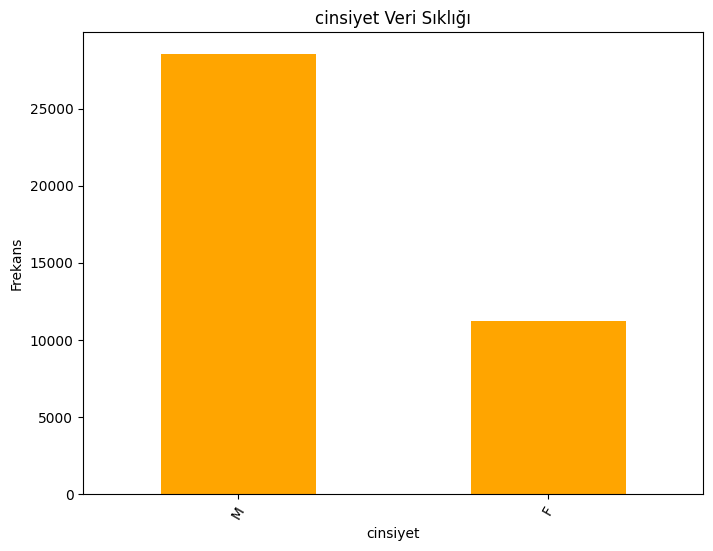

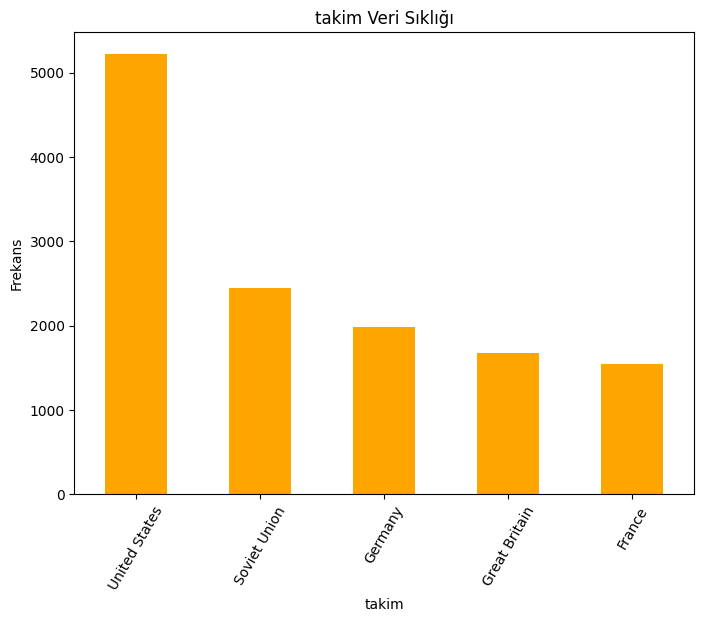

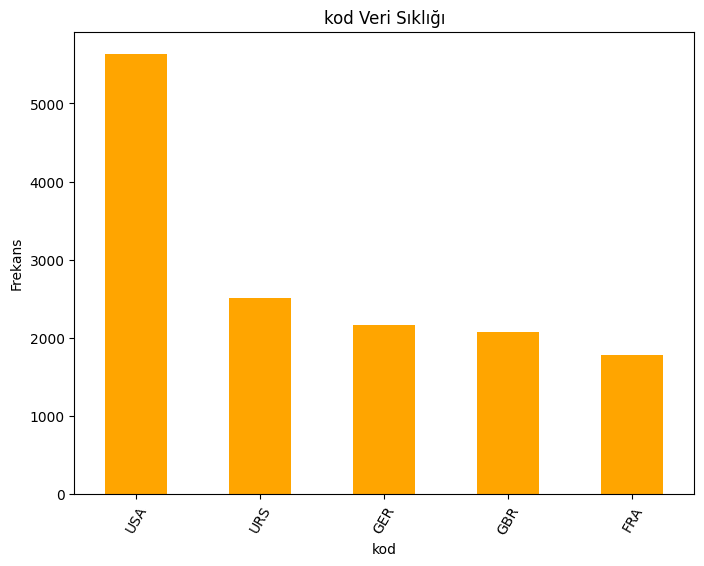

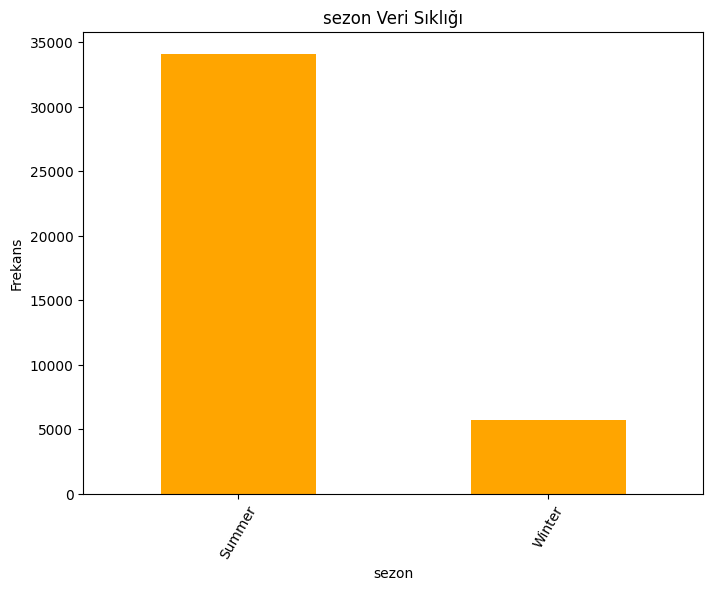

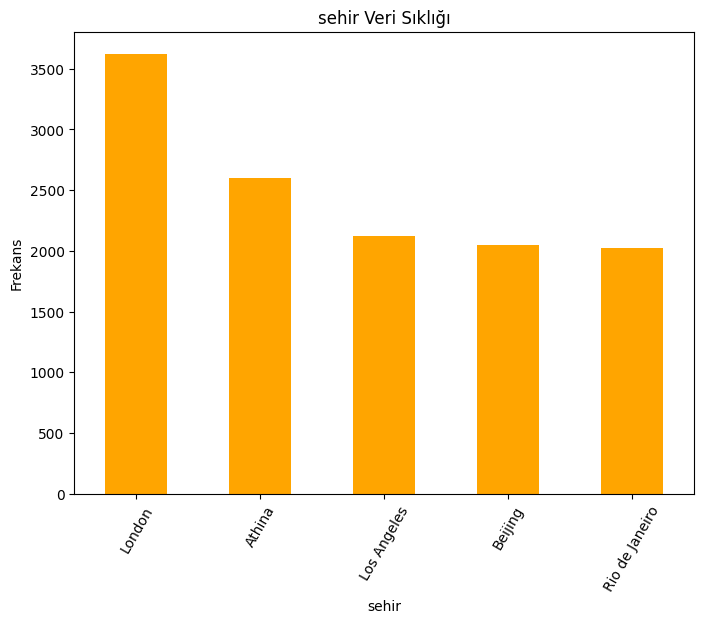

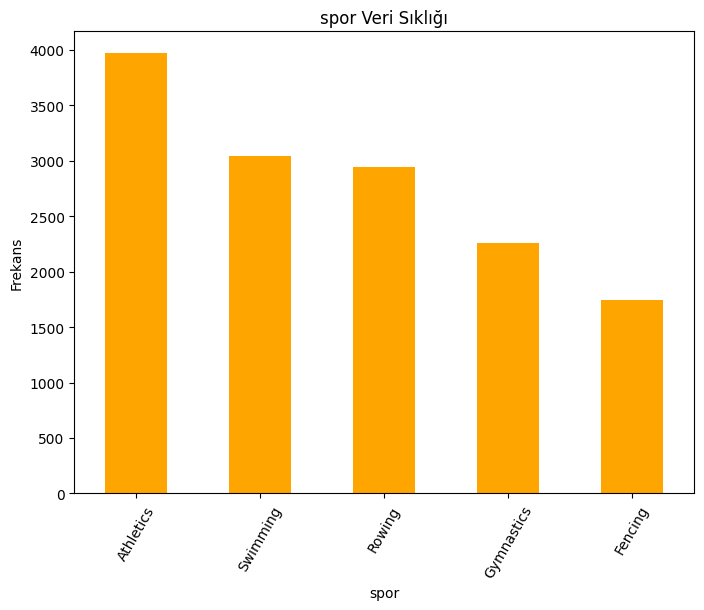

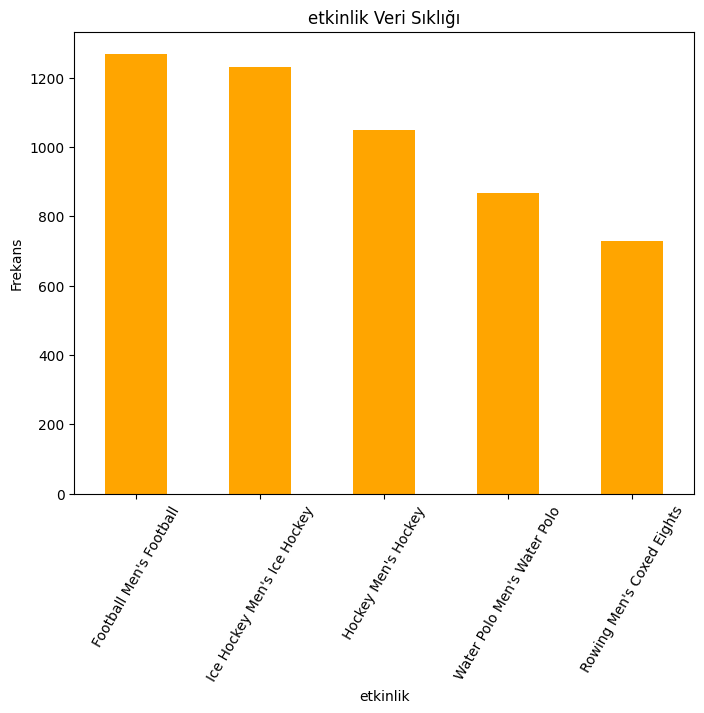

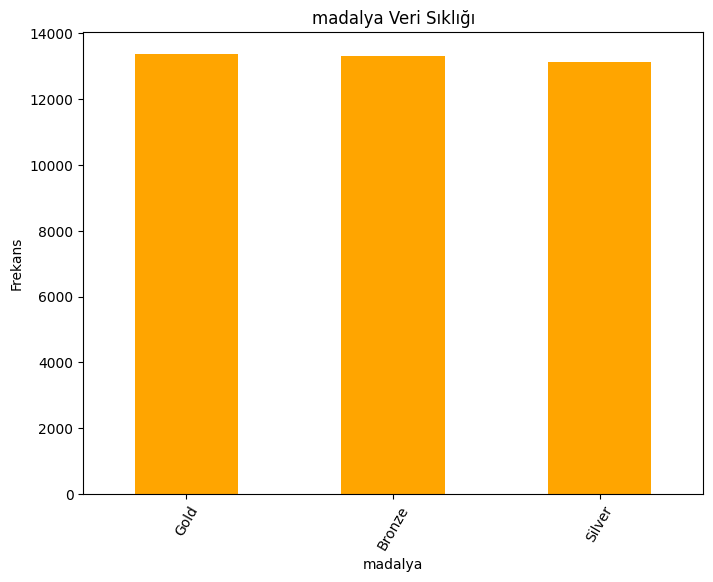

In [21]:
kategorik_degiskenler=['isim', 'cinsiyet', 'takim', 'kod', 'sezon', 'sehir', 'spor', 'etkinlik', 'madalya']
for i in kategorik_degiskenler:
    plot_bar(i)


* Olimpiyat tarihi boyunca en çok madalya kazanan isim Micheal Phelps'dir.
* Kadın ve erkek yarışmacılar arasında yaklaşık 1:2 oranı görülmektedir.
* Takımlar olarak en çok ABD katılmıştır.
* Beklendiği gibi uok ve takım çıktıları aynıdır.
* Yaz sezonunda düzenlenen olimpiyat sayısı kış sezonunda düzenlenenden fazladır.
* Olimpiyatlar en çok Londra'da düzenlenmiştir.
* Olimpiyatlarda en çok atletizm branşında yarışılmıştır.
* Erkekler futbol müsabakaları en çok yapılan etkinliktir.
* Verilen madalyaların aynı çıkmasını beklerken, farklılık olduğu görülmektedir.

<a id='4'></a>
## İki Değişkenli Veri Analizi
* İki değişkenli veri analizi yaparken kazanılan madalyalar ve diğer sütunlar arasında bulunan ilişkileri inceleyeceğiz.
    1. Cinsiyete göre boy ve kilo karşılaştırması
    1. Saysal sütunlar arasında ilişkinin incelenmesi
    1. Madalya ve yaş arasındaki ilişkinin incelenmesi
    1. Takımların kazandıkları altın, gümüş ve bronz madalya sayıları
    1. Kazanılan madalyaların hangi şehirlerde kazanıldığı
    1. Cinsiyete göre kazanılan altın, gümüş ve bronz madalya sayıları
* Görselleştirme bölümünde farklı görselleştirme teknikleri kullanılarak veri analizine devam edilecektir.    

### 
Cinsiyete Göre Boy ve Kilo Karşılaştırması

In [22]:


erkek=veri[veri.cinsiyet=='M']
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,kod,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [23]:
kadin=veri[veri.cinsiyet=='F']
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,kod,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


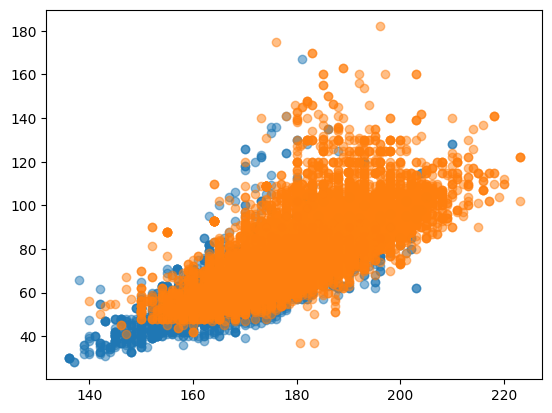

In [24]:
plt.figure()
plt.scatter(kadin.boy,kadin.kilo,alpha=0.5,label="kadın")
plt.scatter(erkek.boy,erkek.kilo,alpha=0.5,label="erkek")

* Boy ve kilo arasında pozitif ilişki olduğunu anlıyoruz.

### Sayısal Sütunlar Arasında İlişki İncelemesi

In [25]:

veri.loc[:,["yas","boy","kilo"]].corr()
# veri[["yas","boy","kilo"]].corr()

,yas,boy,kilo
yas,1.000000,0.06204,0.137607
boy,0.062040,1.00000,0.794290
kilo,0.137607,0.79429,1.000000


* Bir önceki grafikte gördüğümüz boy ve kilo arasında pozitif ilişki durumunu, korelasyon tablosunda da görebiliyoruz.

### Madalya ve Yaş Arasındaki İlişki

In [26]:
# altin, gümüş ve bronz olacak şekilde 3 farklı gruba ayıralım.
veri_gecici=veri.copy()
veri_gecici=pd.get_dummies(veri_gecici,columns=["madalya"],dtype=int)
veri_gecici.head(4)

,isim,cinsiyet,yas,boy,kilo,takim,kod,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0


### Takımların Kazandıkları Altın, Gümüş ve Bronz Madalya Sayıları

In [27]:
veri_gecici[["takim","madalya_Gold","madalya_Silver","madalya_Bronze"]].groupby(["takim"]).sum().sort_values(by="madalya_Silver",ascending=False).head(10)
# ascending=False azalan sıralama 

,madalya_Gold,madalya_Silver,madalya_Bronze
takim,,,
United States,2474,1512,1233
Soviet Union,1058,716,677
Germany,679,627,678
Great Britain,519,582,572
France,455,518,577
Italy,535,508,484
Sweden,451,476,507
Australia,342,453,511
Canada,422,413,408


### Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı

In [28]:
veri_gecici[["sehir","madalya_Gold","madalya_Silver","madalya_Bronze"]].groupby(["sehir"]).sum().sort_values(by="madalya_Gold",ascending=False).head(10)
# ascending=False azalan sıralama 

,madalya_Gold,madalya_Silver,madalya_Bronze
sehir,,,
London,1215,1195,1214
Athina,883,859,860
Los Angeles,726,691,706
Beijing,671,667,710
Rio de Janeiro,665,655,703
Sydney,663,661,680
Atlanta,608,605,629
Barcelona,559,549,604
Seoul,520,513,549


### Cinsiyete Göre Kazanılan Altın, Gümüş ve Bronz Madalya Sayıları

In [29]:
veri_gecici[["cinsiyet","madalya_Gold","madalya_Silver","madalya_Bronze"]].groupby(["cinsiyet"]).sum().sort_values(by="madalya_Gold",ascending=False)[:10]
# ascending=False azalan sıralama 

,madalya_Gold,madalya_Silver,madalya_Bronze
cinsiyet,,,
M,9625,9381,9524
F,3747,3735,3771


<a id='5'></a>
## Çok Değişkenli Veri Analizi

### Pivot Tablosu
* Pivot tablo, veritabanı, iş zekası programı ya da veri tablosu gibi, daha geniş bir tabloyu özetleyen istatistik tablosudur. Bu özet, pivot tabloyu anlamlı bir şekilde gruplayan toplamları, ortalamaları veya diğer istatistikleri içerebilir.

In [30]:
veri_pivot=veri.pivot_table(index="madalya",columns="cinsiyet",values=["boy","kilo","yas"],
                            aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min,max,np.std]})
veri_pivot.head(10)


boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003455  180.046978  62.758422  77.856463  69.0  72.0  12.0   
Gold      170.449103  180.320728  63.201297  78.207376  63.0  64.0  13.0   
Silver    170.233973  180.055230  62.868179  77.979809  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

* Bu tabloda farklı madalyalar ve cinsiyetler için boy ve kilo parametrelerinin ortalama yaş parametresinin ise maksimum, minimum ve standart sapmasını görebiliyoruz.

<a id='6'></a>
## Anomali Tespiti
* Aykırı değer, diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır. Bir aykırı değer, ölçümdeki değişkenliğe bağlı olabilir veya deneysel hatayı gösterebilir; ikincisi bazen veri kümesinden çıkarılır. Bir aykırı değer istatistiksel analizlerde ciddi sorunlara neden olabilir.
* 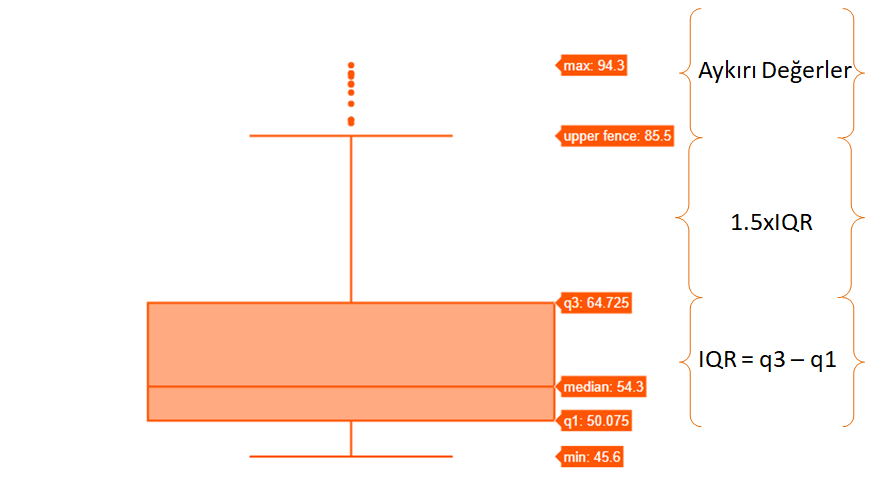

In [31]:
from collections import Counter
import numpy as np

def anamoliTespiti(df, ozellik):
    
    outlier_index = [] 

    for c in ozellik:
        Q1 = np.percentile(df[c], 25)  
        Q3 = np.percentile(df[c], 75)  
        IQR = Q3 - Q1  
        outlier_step = IQR * 1.5  

        
        low_outlier = df[c] < (Q1 - outlier_step)
        high_outlier = df[c] > (Q3 + outlier_step)
        outlier_list = df[low_outlier | high_outlier].index

       
        outlier_index.extend(outlier_list)

    
    multi_outlier = [i for i, v in Counter(outlier_index).items() if v > 1]

    return multi_outlier


* Anamolinin en çok görüldüğü spor branşları yukarıdaki gibidir.

In [32]:
veri_anamoli=veri.loc[anamoliTespiti(veri,["yas","boy","kilo"])]
veri_anamoli.spor.value_counts()
                    

spor
Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: count, dtype: int64

In [33]:
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,kod,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [34]:
veri_gym=veri_anamoli[veri_anamoli.spor=="Basketball"]
veri_gym.head(10)

,isim,cinsiyet,yas,boy,kilo,takim,kod,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
25599,"Carlos Austin Boozer, Jr.",M,26.0,206.0,117.0,United States,USA,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,Gold
40096,Roberto Chiacig,M,29.0,210.0,118.0,Italy,ITA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Silver
45521,DeMarcus Amir Cousins,M,25.0,210.0,122.0,United States,USA,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
56213,Vlade Divac,M,20.0,213.0,110.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
56214,Vlade Divac,M,28.0,213.0,110.0,Serbia and Montenegro,SCG,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Silver


* Jimnastikte meydana gelen anomali sonucunda veriyi incelediğimizde anomalinin nedeni sporcuların yaşlarının küçük ve kilolarının az olmasından kaynaklıdır.
* Ayrıca jimnastikte meydana gelen anomalilerin hepsi kadın sporcular tarafından gerçekleşmiştir.

In [35]:
veri_gym.etkinlik.value_counts()

etkinlik
Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: count, dtype: int64

In [36]:

from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint()'))


<IPython.core.display.Javascript object>